# TASK 1:

Visualizing the distribution of categorical or continuous variables in the Adult Census Income Dataset using bar or historgam charts

# Import Libraries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Checking Null values

In [6]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [7]:
df.loc[df.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [8]:
df = df.drop_duplicates()

In [9]:
df.loc[df.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [10]:
df['age'].describe()

count    32537.000000
mean        38.585549
std         13.637984
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

# EXPLORATORY DATA ANALYSIS

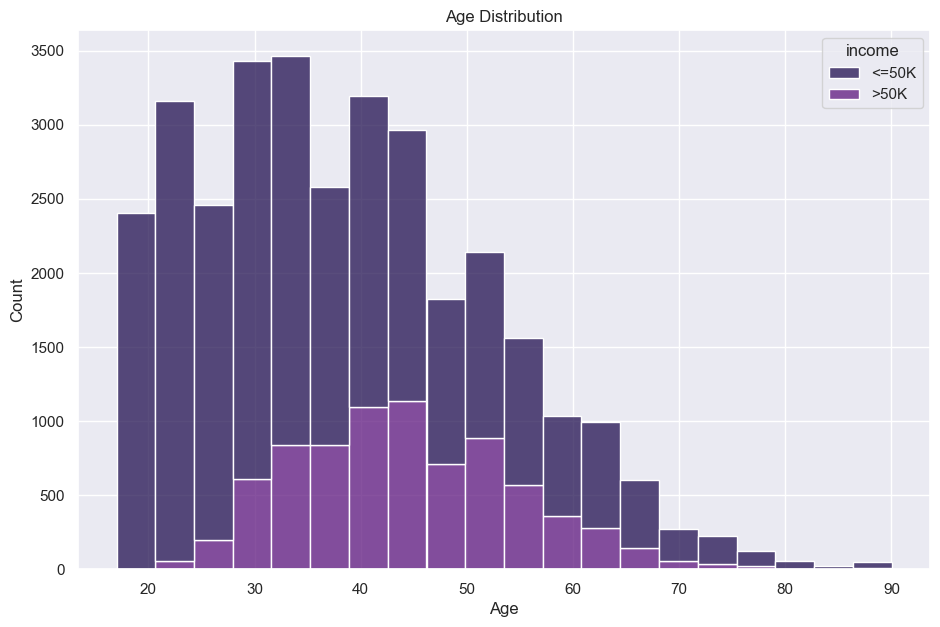

In [18]:
# Age
plt.figure(figsize=(11, 7))

sns.set_palette("magma")
sns.histplot(data=df, x='age', hue='income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [19]:
# workclass
df.groupby('workclass').size()

workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22673
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

Age Distribution For Workclass  
 count    1836.000000
mean       40.960240
std        20.334587
min        17.000000
25%        21.000000
50%        35.000000
75%        61.000000
max        90.000000
Name: age, dtype: float64


<Axes: title={'center': 'age distribution for workclass "?"'}, xlabel='age', ylabel='Count'>

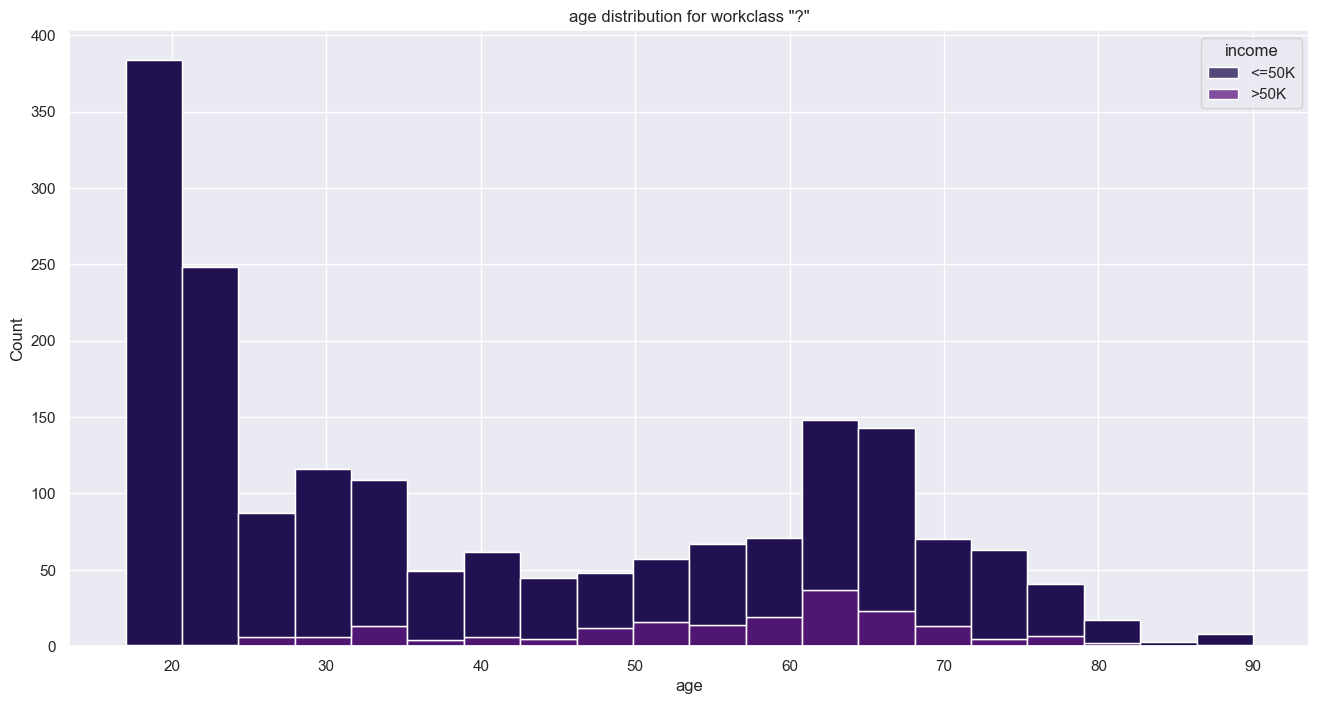

In [21]:
workclass_unknown = df.loc[df['workclass'] == '?']
print('Age Distribution For Workclass  \n', workclass_unknown['age'].describe())
plt.figure(figsize=(16, 8))
plt.title('age distribution for workclass "?"')
plt.hist(workclass_unknown['age'], bins=20)
sns.histplot(data=df.loc[df['workclass'] == '?'], x='age', hue='income', bins=20, multiple='stack')

In [22]:
print(df.query('age < 20').groupby('workclass').size())
print(df.query('age > 20 and age < 60').groupby('workclass').size())
print(df.query('age > 60').groupby('workclass').size())

workclass
?                    269
Federal-gov            9
Local-gov             35
Never-worked           4
Private             1249
Self-emp-inc          16
Self-emp-not-inc      37
State-gov             32
Without-pay            2
dtype: int64
workclass
?                     928
Federal-gov           874
Local-gov            1875
Never-worked            2
Private             19599
Self-emp-inc          940
Self-emp-not-inc     2108
State-gov            1158
Without-pay             5
dtype: int64
workclass
?                    493
Federal-gov           58
Local-gov            151
Private             1070
Self-emp-inc         143
Self-emp-not-inc     338
State-gov             71
Without-pay            7
dtype: int64


In [23]:
df.loc[df['workclass'] == '?', 'workclass'] = 'Private'
df.loc[df['workclass'] == '?' ]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


Text(0.5, 1.0, 'Workclass')

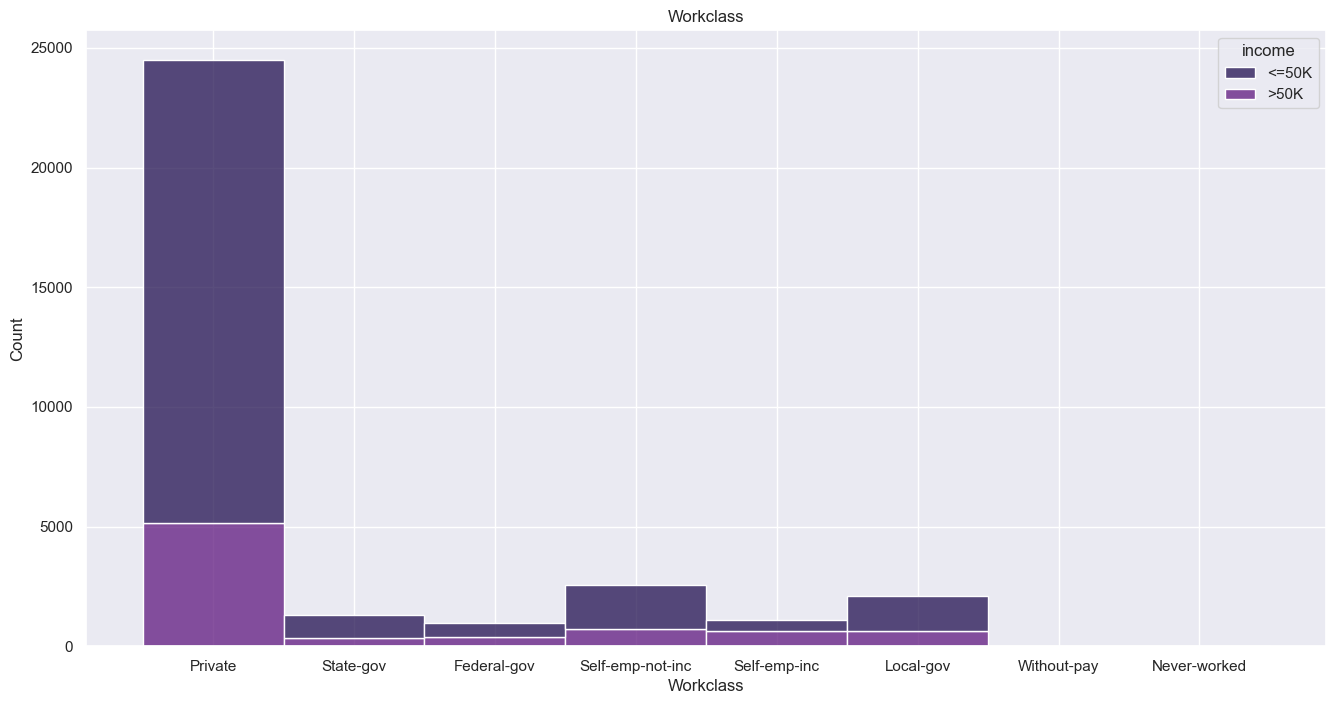

In [24]:
plt.figure(figsize=(16, 8))
sns.histplot(data=df, x='workclass', hue='income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')

In [25]:
df.groupby(df['workclass']).size()

workclass
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             24509
Self-emp-inc         1116
Self-emp-not-inc     2540
State-gov            1298
Without-pay            14
dtype: int64

Text(0.5, 0, 'Final Weight')

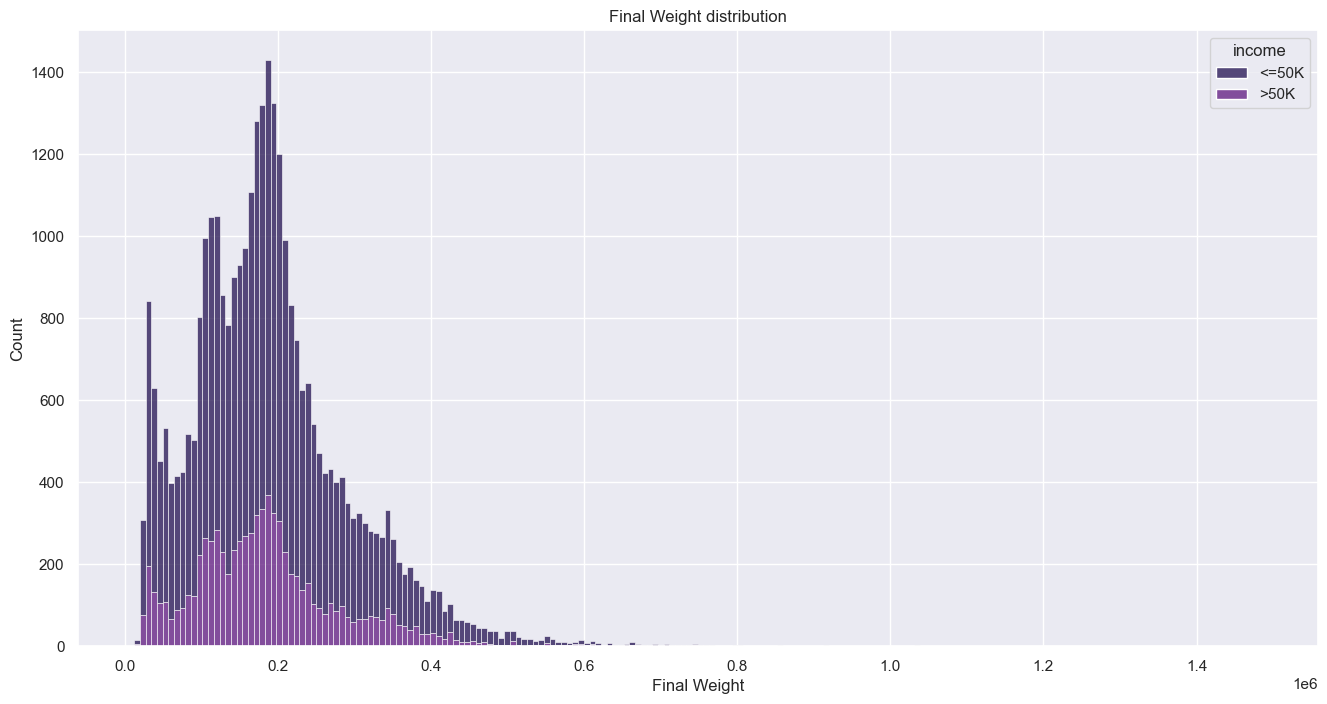

In [26]:
# Final Weight
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=df, hue='income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')

In [27]:
# Education
df.groupby('education').size()

education
10th              933
11th             1175
12th              433
1st-4th           166
5th-6th           332
7th-8th           645
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5353
Doctorate         413
HS-grad         10494
Masters          1722
Preschool          50
Prof-school       576
Some-college     7282
dtype: int64

<Axes: xlabel='education', ylabel='count'>

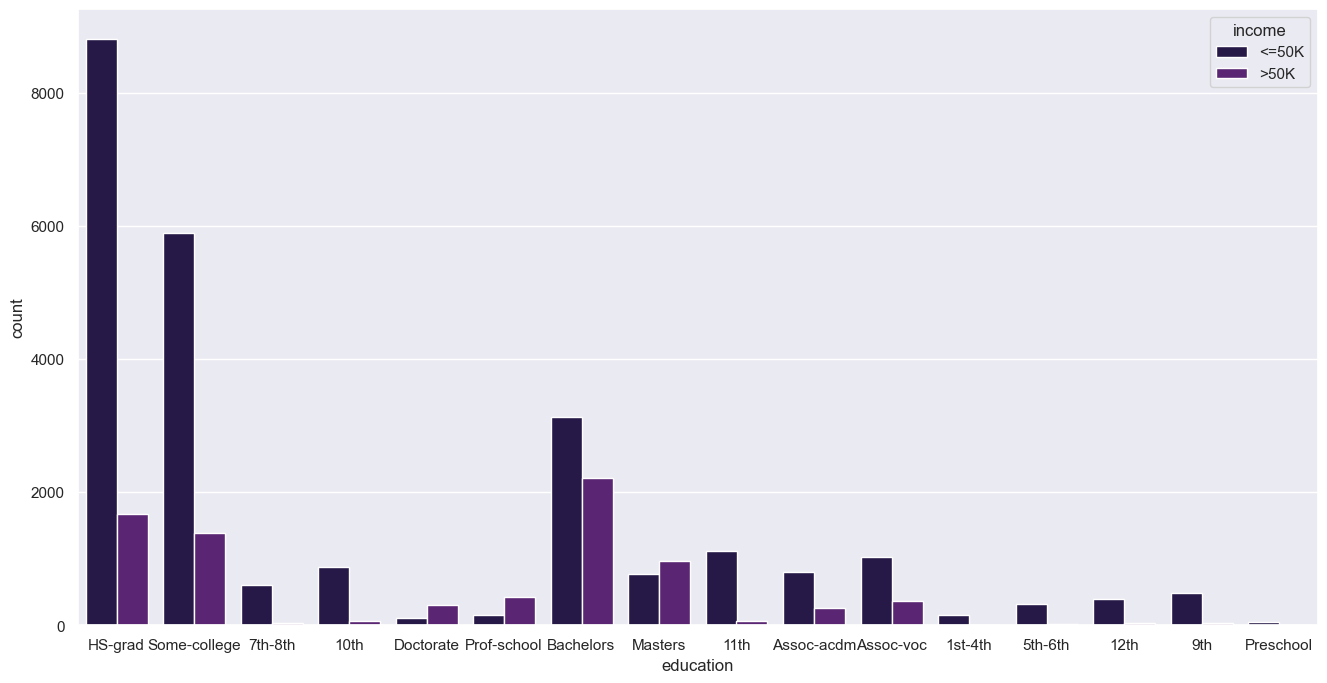

In [30]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=df, hue='income')